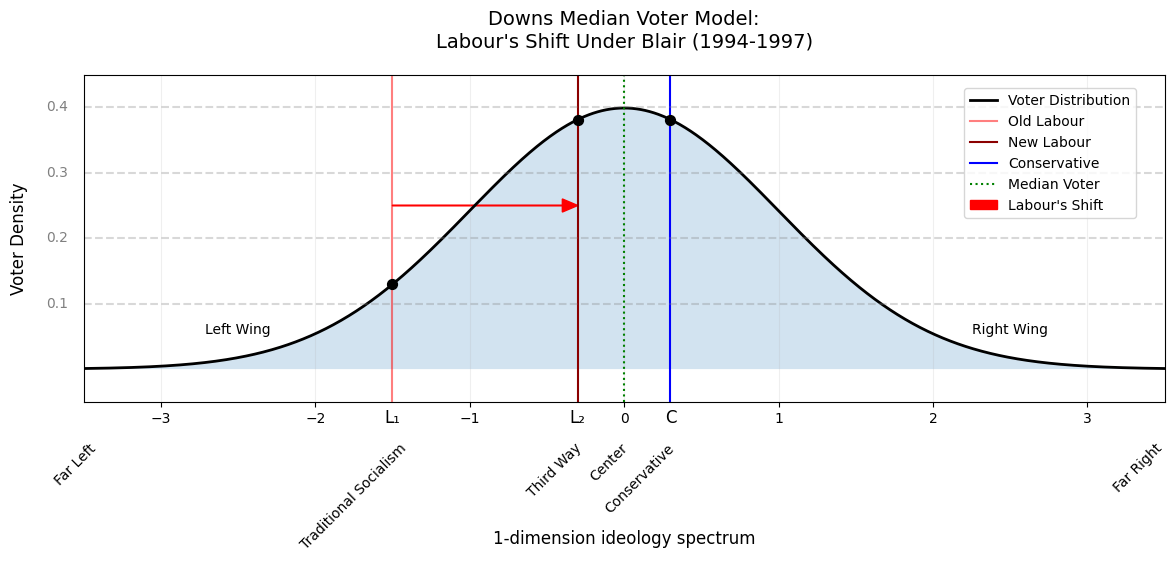

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.figure(figsize=(12, 6))
np.random.seed(42)

# normal distribution
x = np.linspace(-3.5, 3.5, 1000)
y = norm.pdf(x, 0, 1)

# main curve
plt.plot(x, y, 'k-', lw=2, label='Voter Distribution')
plt.fill_between(x, y, alpha=0.2)

positions = {
    'Old Labour': {'x': -1.5, 'color': 'red', 'style': '-', 'alpha': 0.5},
    'New Labour': {'x': -0.3, 'color': 'darkred', 'style': '-'},
    'Conservative': {'x': 0.3, 'color': 'blue', 'style': '-'},
    'Median Voter': {'x': 0, 'color': 'green', 'style': ':'}
}

# party line
for party, attrs in positions.items():
    plt.axvline(x=attrs['x'], color=attrs['color'], 
                linestyle=attrs.get('style', '-'), 
                alpha=attrs.get('alpha', 1), 
                label=party)

# Labour's shift
plt.arrow(positions['Old Labour']['x'], 0.25, 
         positions['New Labour']['x'] - positions['Old Labour']['x'], 0,
         head_width=0.02, head_length=0.1, fc='red', ec='red', 
         length_includes_head=True, label='Labour\'s Shift')

points = {
    'L₁': positions['Old Labour']['x'],
    'L₂': positions['New Labour']['x'],
    'C': positions['Conservative']['x']
}
y_values = {k: norm.pdf(x, loc=0, scale=1) for k, x in points.items()}

# intersection points
for label, x in points.items():
    y = norm.pdf(x, loc=0, scale=1)
    plt.scatter(x, y, color='black', s=50, zorder=5)  # zorder ensures points render a layer above the curve

# annotations seem abritary relative to y axis, but aligning with rotated text requires trial and error
annotations = {
    -3.55: 'Far Left', -1.75: 'Traditional Socialism', 
    -0.45: 'Third Way', -0.1: 'Center', 
    0.1: 'Conservative', 3.325: 'Far Right'
}

plt.text(positions['Old Labour']['x'], -0.06, 'L₁', ha='center', va='top', fontsize=12)
plt.text(positions['New Labour']['x'], -0.06, 'L₂', ha='center', va='top', fontsize=12)
plt.text(positions['Conservative']['x'], -0.06, 'C', ha='center', va='top', fontsize=12)

for x_pos, label in annotations.items():
    plt.text(x_pos, -0.11, label, ha='center', va='top', 
             fontsize=10, rotation=45)


for x, label in [(-2.5, 'Left Wing'), (2.5, 'Right Wing')]:
    plt.annotate(label, xy=(x, 0.05), ha='center', va='bottom')

# horizontal lines
for y in [0.1, 0.2, 0.3, 0.4]:
    plt.axhline(y=y, color='gray', linestyle='--', alpha=0.3)
    plt.text(-3.6, y, f'{y:.1f}', va='center', ha='right', 
             fontsize=10, color='gray')


plt.title("Downs Median Voter Model:\nLabour's Shift Under Blair (1994-1997)", 
          pad=20, size=14)
plt.xlabel("1-dimension ideology spectrum", size=12, labelpad=75)
plt.ylabel("Voter Density", size=12, labelpad=40)
plt.legend(loc='upper right', bbox_to_anchor=(0.98, 0.98))
plt.grid(True, alpha=0.2)
plt.xlim(-3.5, 3.5)
plt.ylim(-0.05, 0.45)
plt.yticks([])

plt.tight_layout(pad=1.5)
plt.savefig("img/spatial_model.png")